<a href="https://colab.research.google.com/github/pekopeko1/covid-19/blob/master/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

東京都の公式サイト情報からjsonファイル取得

In [1]:
!wget --no-check-certificate --output-document=covid19_tokyo.json 'https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/data.json'

--2020-07-31 22:06:08--  https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3641070 (3.5M) [text/plain]
Saving to: ‘covid19_tokyo.json’

covid19_tokyo.json  100%[===================>]   3.47M  12.0MB/s    in 0.3s    

2020-07-31 22:06:08 (12.0 MB/s) - ‘covid19_tokyo.json’ saved [3641070/3641070]




感染者情報は['patients_summary']['data']にある


In [2]:
import pandas as pd
from dateutil.parser import parse
data = pd.read_json('covid19_tokyo.json')
date_data = []
dc_data = []
for i in range(len(data['patients_summary']['data'])):
    date_data.append(parse(data['patients_summary']['data'][i]['日付']))
    dc_data.append(data['patients_summary']['data'][i]['小計'])
print(date_data)
print(dc_data)

[datetime.datetime(2020, 1, 24, 8, 0, tzinfo=tzlocal()), datetime.datetime(2020, 1, 25, 8, 0, tzinfo=tzlocal()), datetime.datetime(2020, 1, 26, 8, 0, tzinfo=tzlocal()), datetime.datetime(2020, 1, 27, 8, 0, tzinfo=tzlocal()), datetime.datetime(2020, 1, 28, 8, 0, tzinfo=tzlocal()), datetime.datetime(2020, 1, 29, 8, 0, tzinfo=tzlocal()), datetime.datetime(2020, 1, 30, 8, 0, tzinfo=tzlocal()), datetime.datetime(2020, 1, 31, 8, 0, tzinfo=tzlocal()), datetime.datetime(2020, 2, 1, 8, 0, tzinfo=tzlocal()), datetime.datetime(2020, 2, 2, 8, 0, tzinfo=tzlocal()), datetime.datetime(2020, 2, 3, 8, 0, tzinfo=tzlocal()), datetime.datetime(2020, 2, 4, 8, 0, tzinfo=tzlocal()), datetime.datetime(2020, 2, 5, 8, 0, tzinfo=tzlocal()), datetime.datetime(2020, 2, 6, 8, 0, tzinfo=tzlocal()), datetime.datetime(2020, 2, 7, 8, 0, tzinfo=tzlocal()), datetime.datetime(2020, 2, 8, 8, 0, tzinfo=tzlocal()), datetime.datetime(2020, 2, 9, 8, 0, tzinfo=tzlocal()), datetime.datetime(2020, 2, 10, 8, 0, tzinfo=tzlocal()), 

## 東京のの日時罹患者数

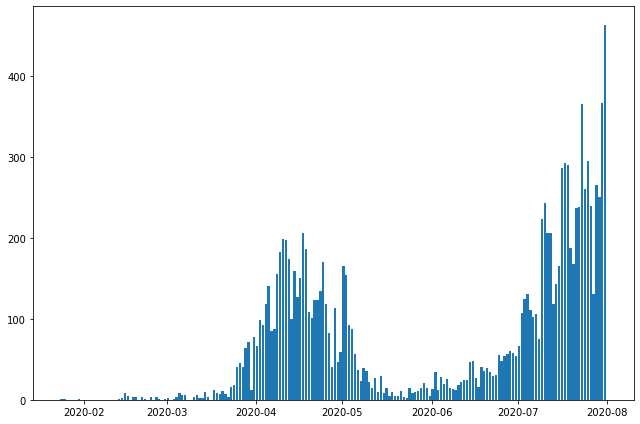

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,6))
plt.bar(date_data, dc_data)
fig.tight_layout()

[ToDo]東京都の移動平均線（7、14、21）

In [4]:
def sma(closeList=[], term=5):
    '''単純移動平均の計算'''
    return list(pd.Series(closeList).rolling(term).mean())

dma7_data = sma(dc_data,7)
dma14_data = sma(dc_data,14)
dma21_data = sma(dc_data,21)
print(dma7_data)
print(dma14_data)
print(dma21_data)

[nan, nan, nan, nan, nan, nan, 0.42857142857142855, 0.2857142857142857, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.42857142857142855, 1.5714285714285714, 2.2857142857142856, 2.2857142857142856, 2.7142857142857144, 3.142857142857143, 3.0, 3.142857142857143, 2.142857142857143, 1.4285714285714286, 1.8571428571428572, 1.4285714285714286, 1.4285714285714286, 1.5714285714285714, 1.1428571428571428, 1.1428571428571428, 1.4285714285714286, 1.0, 1.1428571428571428, 1.2857142857142858, 2.2857142857142856, 3.142857142857143, 3.857142857142857, 3.5714285714285716, 3.5714285714285716, 3.857142857142857, 4.142857142857143, 3.2857142857142856, 2.7142857142857144, 3.2857142857142856, 3.7142857142857144, 3.7142857142857144, 5.0, 5.428571428571429, 6.142857142857143, 7.428571428571429, 7.0, 7.0, 9.285714285714286, 10.142857142857142, 14.714285714285714, 20.285714285714285, 24.428571428

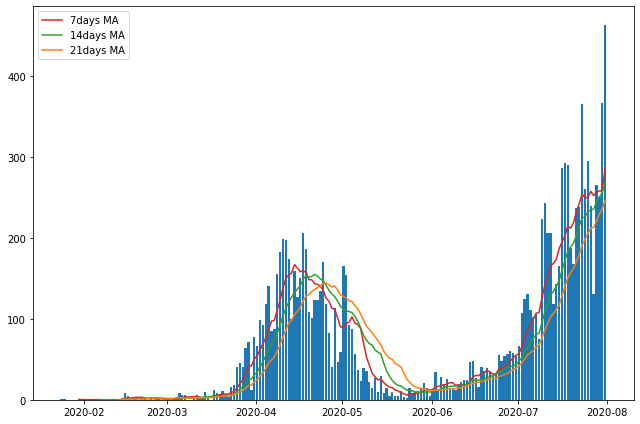

In [5]:
fig = plt.figure(figsize=(9,6))
plt.plot(date_data, dma7_data, c='C3', mew='3', label='7days MA')
plt.plot(date_data, dma14_data, c='C2', mew='3', label='14days MA')
plt.plot(date_data, dma21_data, c='C1', mew='3', label='21days MA')
plt.bar(date_data, dc_data)
plt.legend()
fig.tight_layout()


##東京都のMACD
* MACD = 短期EMA（12） – 長期EMA（26） 
* シグナル = MACDの指数平滑移動平均（9） 
* シグナルヒストグラム = MACD - シグナル


In [6]:
import numpy as np
def ema(closeList=[], term=5):
    '''指数平滑移動平均の計算'''
    return list(pd.Series(closeList).ewm(span=term).mean())
ema12_data = ema(dc_data,12)
ema26_data = ema(dc_data,26)
macd_data = list(np.array(ema12_data) - np.array(ema26_data))
signal_data = ema(macd_data,9)
macdhist_data = list(np.array(macd_data) - np.array(signal_data))
macdhist_plus_data = [ 0.0 if i < 0 else i for i in macdhist_data ]
macdhist_minus_data = [ 0.0 if i > 0 else i for i in macdhist_data ]

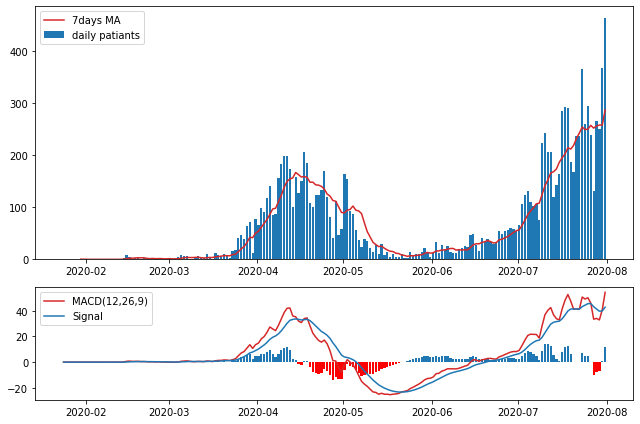

In [7]:
fig = plt.figure(figsize=(9,6))
ax1 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax2 = plt.subplot2grid((3,1), (2,0))
ax1.plot(date_data, dma7_data, c='C3', mew='3', label='7days MA')
ax1.bar(date_data, dc_data, label='daily patiants')
ax1.legend()
ax2.plot(date_data, macd_data, c='C3', mew='3', label='MACD(12,26,9)')
ax2.plot(date_data, signal_data, c='C0', mew='3', label='Signal')
ax2.bar(date_data, macdhist_plus_data)
ax2.bar(date_data, macdhist_minus_data, color='red')
ax2.legend()
fig.tight_layout()

##東京都の倍日数
参考：[倍になるのはいつか](https://note.com/ogatahisato/n/nc72e01b64a7c)

* d/(logn(C2)-logn(C1))
  * d:経過日数
  * c:累計感染者数

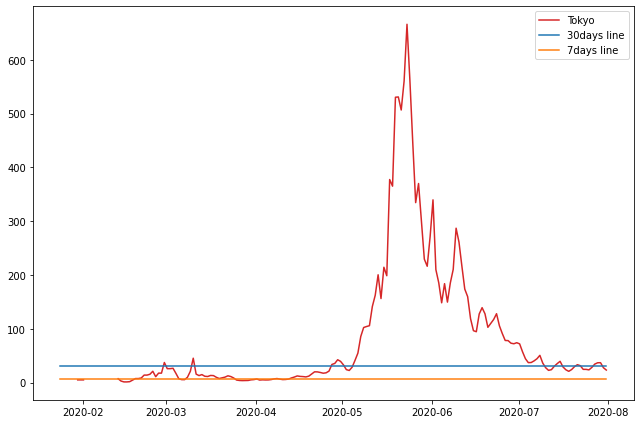

In [21]:
import math
def get_increase_pace(closeList=[], d=3, n=2):
    '''n倍になるのに要する日数の推移'''
    pace_list = []
    for i in range(len(closeList)):
      if i < d:
        pace_list.append(None)
      else:
        try:
          calc = float(d)/(math.log(closeList[i], n) - math.log(closeList[i-d], n))
          if calc < 0:
            pace_list.append(None)
          else:
            pace_list.append(calc)
        except (ZeroDivisionError, ValueError):
          pace_list.append(None)
    return pace_list
 
def cumsumlist(closeList=[]):
    '''日時データから累計を算出'''
    return list(pd.Series(closeList).cumsum())
 
monthline = [ 30 for i in date_data ]
weekline = [ 7 for i in date_data ]
fig = plt.figure(figsize=(9,6))
plt.plot(date_data, get_increase_pace(cumsumlist(dc_data)), c='C3', mew='3', label='Tokyo')
plt.plot(date_data, monthline, label='30days line')
plt.plot(date_data, weekline, label='7days line')
plt.legend()
fig.tight_layout()

##日本、世界の情報で作成
* 各種データの取扱いは[ここ](https://oku.edu.mie-u.ac.jp/~okumura/python/COVID-19.html)がわかりやすい。

In [9]:
!wget --no-check-certificate --output-document=time_series_covid19_confirmed_global.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

--2020-07-31 22:06:16--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 199168 (194K) [text/plain]
Saving to: ‘time_series_covid19_confirmed_global.csv’

time_series_covid19 100%[===================>] 194.50K  --.-KB/s    in 0.05s   

2020-07-31 22:06:16 (4.21 MB/s) - ‘time_series_covid19_confirmed_global.csv’ saved [199168/199168]



In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from dateutil.parser import parse

df = pd.read_csv('time_series_covid19_confirmed_global.csv')

g_datedata = [parse(i) for i in df.columns[4:]]
jp_c_data = df[df['Country/Region'] == 'Japan'].T[4:]
us_c_data = df[df['Country/Region'] == 'US'].T[4:]
it_c_data = df[df['Country/Region'] == 'Italy'].T[4:]
es_c_data = df[df['Country/Region'] == 'Spain'].T[4:]
kr_c_data = df[df['Country/Region'] == 'Korea, South'].T[4:]
de_c_data = df[df['Country/Region'] == 'Germany'].T[4:]
uk_c_data = df[df['Country/Region'] == 'United Kingdom'].T[4:][223]
br_c_data = df[df['Country/Region'] == 'Brazil'].T[4:]
ru_c_data = df[df['Country/Region'] == 'Russia'].T[4:]
br_c_data

,28
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
7/26/20,2419091
7/27/20,2442375
7/28/20,2483191
7/29/20,2552265


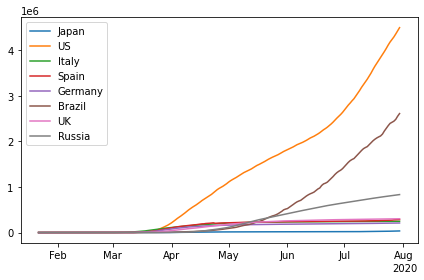

In [11]:
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.plot(g_datedata, jp_c_data, label='Japan')
ax.plot(g_datedata, us_c_data, label='US')
ax.plot(g_datedata, it_c_data, label='Italy')
ax.plot(g_datedata, es_c_data, label='Spain')
ax.plot(g_datedata, de_c_data, label='Germany')
ax.plot(g_datedata, br_c_data, label='Brazil')
ax.plot(g_datedata, uk_c_data, label='UK')
ax.plot(g_datedata, ru_c_data, label='Russia')
ax.legend()

fig.tight_layout()

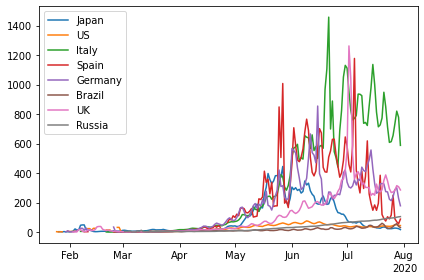

In [12]:
jp_inc_data = get_increase_pace(list(jp_c_data[139]))
us_inc_data = get_increase_pace(list(us_c_data[225]))
it_inc_data = get_increase_pace(list(it_c_data[137]))
es_inc_data = get_increase_pace(list(es_c_data[201]))
kr_inc_data = get_increase_pace(list(kr_c_data[143]))
de_inc_data = get_increase_pace(list(de_c_data[120]))
uk_inc_data = get_increase_pace(list(uk_c_data))
br_inc_data = get_increase_pace(list(br_c_data[28]))
ru_inc_data = get_increase_pace(list(ru_c_data[187]))
 
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.plot(g_datedata, jp_inc_data, label='Japan')
ax.plot(g_datedata, us_inc_data, label='US')
ax.plot(g_datedata, it_inc_data, label='Italy')
ax.plot(g_datedata, es_inc_data, label='Spain')
#ax.plot(g_datedata, kr_inc_data, label='S.Korea')
ax.plot(g_datedata, de_inc_data, label='Germany')
ax.plot(g_datedata, br_inc_data, label='Brazil')
ax.plot(g_datedata, uk_inc_data, label='UK')
ax.plot(g_datedata, ru_inc_data, label='Russia')
ax.legend()
 
fig.tight_layout()